**Importing Necessary Libraries**

In [79]:
# Importing libraries for various tasks
import os                      # To interact with the file system
import random                  # To generate random numbers
import pickle                  # To serialize and deserialize objects
import numpy as np             # For numerical computations
import tensorflow as tf        # For deep learning and neural network building
from tensorflow.keras.layers import RandomRotation   # For image augmentation
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0  # Pretrained models
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout  # Layers for model customization
from tensorflow.keras.utils import load_img, img_to_array  # For loading and preprocessing images
from tensorflow.keras.models import Model          # For building models
import matplotlib.pyplot as plt                   # For data visualization
from sklearn.metrics import confusion_matrix, classification_report  # For evaluation metrics
import seaborn as sns                              # For enhanced data visualizations

**Mounting Google Drive**

In [ ]:
# Mount Google Drive to access project files
from google.colab import drive
drive.mount('/content/drive')  # This will prompt for access to Google Drive

Mounted at /content/drive


## **Data Setup**

The notebook proceeds to define the directories for dataset organization and displays the available image counts for each denomination.

**Dataset Directory Setup**

The main directory (DATA_DIR) is specified, and subdirectories are created for each class of currency. Each subdirectory contains images corresponding to a specific currency denomination.

In [ ]:
# Directory that holds the data
DATA_DIR = '/content/drive/Shared drives/Capstone Project/Dataset/dataset_powerful/train/'

# Define subdirectories for each class of currency (e.g., 100COIN, 1RIBU, etc.)
data_dir_1000C = os.path.join(DATA_DIR, '1000COIN')  # Directory for 1000 Rupiah coins
data_dir_100C = os.path.join(DATA_DIR, '100COIN')   # Directory for 100 Rupiah coins
data_dir_200C = os.path.join(DATA_DIR, '200COIN')   # Directory for 200 Rupiah coins
data_dir_500C = os.path.join(DATA_DIR, '500COIN')   # Directory for 500 Rupiah coins
data_dir_1K = os.path.join(DATA_DIR, '1RIBU')       # Directory for 1000 Rupiah notes
data_dir_2K = os.path.join(DATA_DIR, '2RIBU')       # Directory for 2000 Rupiah notes
data_dir_5K = os.path.join(DATA_DIR, '5RIBU')       # Directory for 5000 Rupiah notes
data_dir_10K = os.path.join(DATA_DIR, '10RIBU')     # Directory for 10,000 Rupiah notes
data_dir_20K = os.path.join(DATA_DIR, '20RIBU')     # Directory for 20,000 Rupiah notes
data_dir_50K = os.path.join(DATA_DIR, '50RIBU')     # Directory for 50,000 Rupiah notes
data_dir_75K = os.path.join(DATA_DIR, '75RIBU')     # Directory for 75,000 Rupiah notes
data_dir_100K = os.path.join(DATA_DIR, '100RIBU')   # Directory for 100,000 Rupiah notes

# os.listdir returns a list containing all files under the given dir
print(f"There are {len(os.listdir(data_dir_1000C))} images of coin 1000 rupiah.")
print(f"There are {len(os.listdir(data_dir_100C))} images of coin 100 rupiah.")
print(f"There are {len(os.listdir(data_dir_200C))} images of coin 200 rupiah.")
print(f"There are {len(os.listdir(data_dir_500C))} images of coin 500 rupiah.")
print(f"There are {len(os.listdir(data_dir_1K))} images of 1000 rupiah.")
print(f"There are {len(os.listdir(data_dir_2K))} images of 2000 rupiah.")
print(f"There are {len(os.listdir(data_dir_5K))} images of 5000 rupiah.")
print(f"There are {len(os.listdir(data_dir_10K))} images of 10000 rupiah.")
print(f"There are {len(os.listdir(data_dir_20K))} images of 20000 rupiah.")
print(f"There are {len(os.listdir(data_dir_50K))} images of 50000 rupiah.")
print(f"There are {len(os.listdir(data_dir_75K))} images of 75000 rupiah.")
print(f"There are {len(os.listdir(data_dir_100K))} images of 100000 rupiah.")

There are 540 images of coin 1000 rupiah.
There are 540 images of coin 100 rupiah.
There are 540 images of coin 200 rupiah.
There are 540 images of coin 500 rupiah.
There are 540 images of 1000 rupiah.
There are 540 images of 2000 rupiah.
There are 540 images of 5000 rupiah.
There are 540 images of 10000 rupiah.
There are 540 images of 20000 rupiah.
There are 540 images of 50000 rupiah.
There are 540 images of 75000 rupiah.
There are 540 images of 100000 rupiah.


The os.listdir function lists all files in the directory, and len counts the total number of images for each class.
The output provides insights into the dataset's size and class distribution.

**Displaying Sample Images**

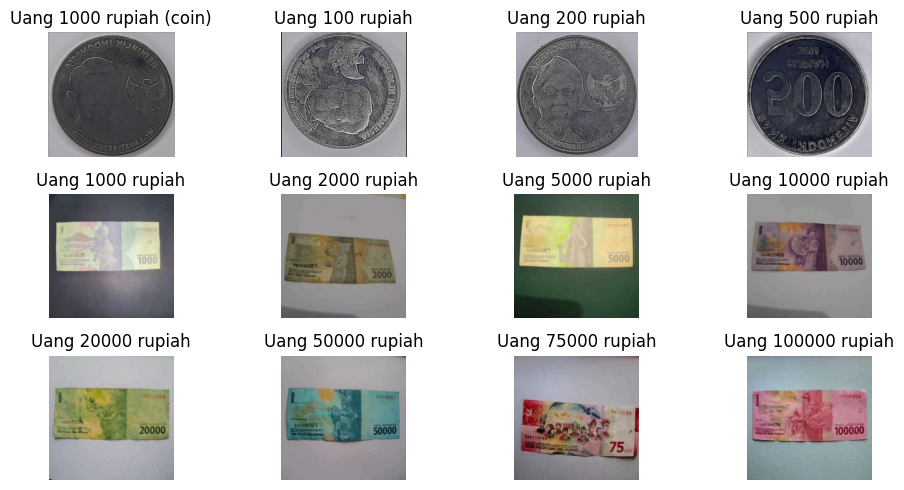

In [ ]:
# Display images from all classes
fig, axes = plt.subplots(3, 4, figsize=(10, 5))  # Create a 3x4 grid of subplots
axes = axes.ravel()  # Flatten the axes array for easier indexing

# Load sample images and their corresponding titles
sample_images = [
    (tf.keras.preprocessing.image.load_img(os.path.join(data_dir_1000C, os.listdir(data_dir_1000C)[0])), '1000 Rupiah (Coin)'),
    (tf.keras.preprocessing.image.load_img(os.path.join(data_dir_100C, os.listdir(data_dir_100C)[0])), '100 Rupiah (Coin)'),
    (tf.keras.preprocessing.image.load_img(os.path.join(data_dir_200C, os.listdir(data_dir_200C)[0])), '200 Rupiah (Coin)'),
    (tf.keras.preprocessing.image.load_img(os.path.join(data_dir_500C, os.listdir(data_dir_500C)[0])), '500 Rupiah (Coin)'),
    (tf.keras.preprocessing.image.load_img(os.path.join(data_dir_1K, os.listdir(data_dir_1K)[0])), '1000 Rupiah'),
    (tf.keras.preprocessing.image.load_img(os.path.join(data_dir_2K, os.listdir(data_dir_2K)[0])), '2000 Rupiah'),
    (tf.keras.preprocessing.image.load_img(os.path.join(data_dir_5K, os.listdir(data_dir_5K)[0])), '5000 Rupiah'),
    (tf.keras.preprocessing.image.load_img(os.path.join(data_dir_10K, os.listdir(data_dir_10K)[0])), '10,000 Rupiah'),
    (tf.keras.preprocessing.image.load_img(os.path.join(data_dir_20K, os.listdir(data_dir_20K)[0])), '20,000 Rupiah'),
    (tf.keras.preprocessing.image.load_img(os.path.join(data_dir_50K, os.listdir(data_dir_50K)[0])), '50,000 Rupiah'),
    (tf.keras.preprocessing.image.load_img(os.path.join(data_dir_75K, os.listdir(data_dir_75K)[0])), '75,000 Rupiah'),
    (tf.keras.preprocessing.image.load_img(os.path.join(data_dir_100K, os.listdir(data_dir_100K)[0])), '100,000 Rupiah')
]

# Plot the images and their titles
for i, (img, title) in enumerate(sample_images):
    axes[i].imshow(img)             # Display the image
    axes[i].set_title(title)        # Set the title for the image
    axes[i].axis('off')             # Hide the axis for better visualization

plt.tight_layout()  # Adjust the layout to avoid overlapping
plt.show()          # Display the plot


## **Data Augmentation and Preprocessing**

This section focuses on enhancing the dataset through augmentation to improve model robustness and creating training and validation datasets for the model.

**Augmentation Setup**

In [ ]:
# Create a RandomRotation layer (to be used for data augmentation)
rotation_layer = RandomRotation(factor=0.2)

# Define augmentation function
def augment(image, label):
    # Randomly flip the image horizontally
    image = tf.image.random_flip_left_right(image)
    
    # Apply random brightness adjustments
    image = tf.image.random_brightness(image, max_delta=0.2)
    
    # Apply random contrast adjustments
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    
    # Rotate the image using the predefined rotation layer
    image = rotation_layer(image)
    
    # Resize the image to 120x120 pixels
    image = tf.image.resize(image, [120, 120])
    
    return image, label

**Dataset Creation**

Loading the Dataset:

* image_dataset_from_directory automatically categorizes images into classes based on subdirectory names.
* The dataset is split into 80% training and 20% validation using validation_split=0.2.

Batch Processing:

* Images are processed in batches of size 128 to optimize memory usage.

Class Names:

* The class names are extracted from the folder structure for labeling during model evaluation.

Data Pipeline Optimization:

* map(augment) applies the augmentation function to the training data.
* prefetch ensures the next batch is loaded while the current batch is being processed, improving training efficiency.

In [ ]:
def train_val_datasets():
    # Load the training dataset with an 80-20 split for training and validation
    training_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=DATA_DIR,          # Path to the dataset directory
        image_size=(120, 120),       # Resize all images to 120x120
        batch_size=128,              # Process images in batches of 128
        validation_split=0.2,        # Reserve 20% of data for validation
        subset="training",           # Specify this subset is for training
        seed=42                      # Use a fixed seed for reproducibility
    )

    # Load the validation dataset
    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=DATA_DIR,
        image_size=(120, 120),
        batch_size=128,
        validation_split=0.2,
        subset="validation",         # Specify this subset is for validation
        seed=42
    )

    # Store the class names for reference
    class_names = training_dataset.class_names
    print(f"Class Names: {class_names}")

    # Apply augmentation and prefetching to the training dataset
    training_dataset = training_dataset.map(augment).prefetch(buffer_size=tf.data.AUTOTUNE)

    # Prefetch the validation dataset for efficiency during training
    validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return training_dataset, validation_dataset, class_names

# Generate training and validation datasets
training_dataset, validation_dataset, class_names = train_val_datasets()

In [ ]:
# Create dataset
training_dataset, validation_dataset, class_names = train_val_datasets()

Found 6480 files belonging to 12 classes.
Using 5184 files for training.
Found 6480 files belonging to 12 classes.
Using 1296 files for validation.
Class Names: ['1000COIN', '100COIN', '100RIBU', '10RIBU', '1RIBU', '200COIN', '20RIBU', '2RIBU', '500COIN', '50RIBU', '5RIBU', '75RIBU']


In [ ]:
# Get the first batch of images and labels
for images, labels in training_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels

print(f"Maximum pixel value of images: {np.max(example_batch_images)}\n")
print(f"Shape of batch of images: {example_batch_images.shape}")
print(f"Shape of batch of labels: {example_batch_labels.shape}")

Maximum pixel value of images: 260.4871826171875

Shape of batch of images: (128, 120, 120, 3)
Shape of batch of labels: (128,)


## **Building the Model Architecture**

This section focuses on defining and compiling the convolutional neural network (CNN) for classifying currency denominations.

**Model Architecture**

In [ ]:
def create_model():
    # Build a sequential model
    model = tf.keras.models.Sequential([
        # Input layer: Accepts 120x120 RGB images
        tf.keras.layers.Input(shape=(120, 120, 3)),

        # Rescaling layer: Normalize pixel values to the range [0, 1]
        tf.keras.layers.Rescaling(1./255),

        # Convolutional block 1
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),  # Reduce spatial dimensions by half
        tf.keras.layers.Dropout(0.3),          # Prevent overfitting

        # Convolutional block 2
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Convolutional block 3
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),

        # Convolutional block 4
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),

        # Global Average Pooling layer: Reduces dimensions to 1D
        tf.keras.layers.GlobalAveragePooling2D(),

        # Fully connected layers
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        tf.keras.layers.Dropout(0.5),  # Dropout for regularization

        # Output layer: 12 classes with softmax activation
        tf.keras.layers.Dense(12, activation='softmax')
    ])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # Use Adam optimizer
        loss='sparse_categorical_crossentropy',                 # Loss function for classification
        metrics=['accuracy']                                    # Track accuracy during training
    )

    return model

In [ ]:
# Instantiate the model
model = create_model()

In [ ]:
# Print input and output shapes
print(f'Input shape: {model.input_shape}') # Expected: (None, 120, 120, 3)
print(f'Output shape: {model.output_shape}') # Expected: (None, 12)

Input shape: (None, 120, 120, 3)
Output shape: (None, 12)


In [ ]:
# Print the model summary
model.summary() # Displays layer-by-layer details, including the number of parameters

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)              │ (None, 120, 120, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 120, 120, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 120, 120, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 120, 120, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 120, 120, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 722,732 (2.76 MB)

 Trainable params: 721,324 (2.75 MB)

 Non-trainable params: 1,408 (5.50 KB)

**Transfer Learning with EfficientNetB0**

EfficientNetB0 is a state-of-the-art convolutional neural network (CNN) architecture designed for efficient scaling of model size and performance. Transfer learning involves leveraging a pre-trained model, fine-tuning it for a specific task.

In [ ]:
# Load the EfficientNetB0 model pre-trained on ImageNet without the fully connected (top) layers
base_model = EfficientNetB0(
    input_shape=(120, 120, 3),   # Input image size: 120x120 RGB
    include_top=False,           # Exclude the fully connected layers to allow customization
    weights='imagenet'           # Use pre-trained weights from ImageNet
)

# Freeze the base model to prevent its weights from being updated during initial training
base_model.trainable = False

# Add custom layers for the classification task
x = base_model.output  # Get the output from the pre-trained model
x = GlobalAveragePooling2D()(x)  # Reduce spatial dimensions to a single vector
x = Dense(512, activation='relu')(x)  # Fully connected layer with 512 neurons
x = Dropout(0.5)(x)                   # Dropout for regularization
x = Dense(256, activation='relu')(x)  # Fully connected layer with 256 neurons
x = Dropout(0.5)(x)                   # Dropout for regularization
x = Dense(128, activation='relu')(x)  # Fully connected layer with 128 neurons
output = Dense(12, activation='softmax')(x)  # Output layer with 12 classes

# Create the final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # Adam optimizer with a learning rate of 0.001
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),    # Loss function for multi-class classification
    metrics=['accuracy']                                    # Track accuracy during training
)

# Display a summary of the model
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 120, 120, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_18 (Rescaling)  │ (None, 120, 120, 3)    │              0 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_7           │ (None, 120, 120, 3)    │              7 │ rescaling_18[0][0]     │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_19 (Rescaling)  │ (None, 120, 120, 3)    │              0 │ normalization_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 121, 121, 3)    │              0 │ rescaling_19[0][0]     │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 60, 60, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 60, 60, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 60, 60, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 60, 60, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 60, 60, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 60, 60, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,871,215 (18.58 MB)

 Trainable params: 821,644 (3.13 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [68]:
# Define a learning rate reduction callback
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor the validation loss
    factor=0.5,           # Reduce the learning rate by a factor of 0.5
    patience=3,           # Wait for 3 epochs without improvement
    min_lr=1e-6,          # Minimum learning rate to prevent it from getting too small
    verbose=1             # Print updates when the learning rate changes
)

# Train the model with the learning rate callback
history = model.fit(
    training_dataset,          # Training dataset
    validation_data=validation_dataset,  # Validation dataset
    epochs=10,                 # Number of epochs for this phase
    callbacks=[lr_reduction]   # Add the callback to dynamically adjust the learning rate
)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 647s 16s/step - accuracy: 0.2273 - loss: 2.0829 - val_accuracy: 0.5571 - val_loss: 1.2410 - learning_rate: 0.0010
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 299s 6s/step - accuracy: 0.5042 - loss: 1.2418 - val_accuracy: 0.7276 - val_loss: 0.7629 - learning_rate: 0.0010
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 227s 5s/step - accuracy: 0.6403 - loss: 0.9069 - val_accuracy: 0.7924 - val_loss: 0.5619 - learning_rate: 0.0010
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 207s 5s/step - accuracy: 0.7290 - loss: 0.7115 - val_accuracy: 0.8048 - val_loss: 0.4772 - learning_rate: 0.0010
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 309s 6s/step - accuracy: 0.7803 - loss: 0.5799 - val_accuracy: 0.8927 - val_loss: 0.3295 - learning_rate: 0.0010
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 253s 6s/step - accuracy: 0.8058 - loss: 0.5111 - val_accuracy: 0.9020 - val_loss: 0.2953 - learning_rate: 0.0010
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 211s 5s/step - accuracy: 0.8317 - loss: 0.4668 - val_ac

**Fine-Tuning the Pre-trained Model**

In this step, we fine-tune the EfficientNetB0 model by unfreezing its layers and allowing gradient updates, while still maintaining stability by freezing some initial layers. This approach ensures that the model’s pre-trained knowledge is refined for the new dataset.

In [69]:
# Unfreeze all layers in the pre-trained model
base_model.trainable = True

# Freeze the first 50 layers to maintain stability in lower-level features
for layer in base_model.layers[:50]:
    layer.trainable = False

# Re-compile the model with a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # Use Adam optimizer with a small learning rate
    loss='sparse_categorical_crossentropy',                  # Loss function for multi-class classification
    metrics=['accuracy']                                     # Track accuracy during training
)

# Add an EarlyStopping callback to halt training when validation loss stops improving
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # Monitor the validation loss
    patience=5,                    # Stop after 5 epochs with no improvement
    restore_best_weights=True      # Restore the best weights for the model
)

# Fine-tune the model with callbacks for learning rate adjustment and early stopping
history = model.fit(
    training_dataset,               # Training dataset
    validation_data=validation_dataset,  # Validation dataset
    epochs=20,                      # Train for up to 20 epochs
    callbacks=[early_stopping, lr_reduction]  # Use both EarlyStopping and ReduceLROnPlateau
)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 469s 10s/step - accuracy: 0.6405 - loss: 1.5921 - val_accuracy: 0.8403 - val_loss: 0.4351 - learning_rate: 0.0010
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 416s 10s/step - accuracy: 0.9384 - loss: 0.1635 - val_accuracy: 0.9282 - val_loss: 0.2059 - learning_rate: 0.0010
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 439s 10s/step - accuracy: 0.9710 - loss: 0.0810 - val_accuracy: 0.9645 - val_loss: 0.1162 - learning_rate: 0.0010
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 448s 10s/step - accuracy: 0.9764 - loss: 0.0809 - val_accuracy: 0.9576 - val_loss: 0.1426 - learning_rate: 0.0010
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 443s 10s/step - accuracy: 0.9822 - loss: 0.0668 - val_accuracy: 0.9545 - val_loss: 0.1582 - learning_rate: 0.0010
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 393s 10s/step - accuracy: 0.9842 - loss: 0.0603 - val_accuracy: 0.9730 - val_loss: 0.0937 - learning_rate: 0.0010
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 407s 10s/step - accuracy: 0.9871 - loss: 0.0424 - 

**Evaluating the Model**

After training and fine-tuning, the model’s performance is evaluated on both the training and validation datasets to ensure it has learned the patterns effectively and generalizes well.

In [70]:
# Evaluate the model on the training dataset
train_loss, train_accuracy = model.evaluate(training_dataset, verbose=1)
print(f"Final Training Accuracy: {train_accuracy:.4f}")  # Print training accuracy
print(f"Final Training Loss: {train_loss:.4f}")          # Print training loss

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(validation_dataset, verbose=1)
print(f"Final Validation Accuracy: {val_accuracy:.4f}")  # Print validation accuracy
print(f"Final Validation Loss: {val_loss:.4f}")          # Print validation loss

41/41 ━━━━━━━━━━━━━━━━━━━━ 166s 4s/step - accuracy: 0.9997 - loss: 0.0012
Final Training Accuracy: 0.9996
Final Training Loss: 0.0010
11/11 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9938 - loss: 0.0155
Final Validation Accuracy: 0.9946
Final Validation Loss: 0.0123


**Visualizing Training and Validation Metrics**

This section visualizes the accuracy and loss metrics for both the training and validation datasets over epochs. It helps identify overfitting, underfitting, or potential room for optimization.

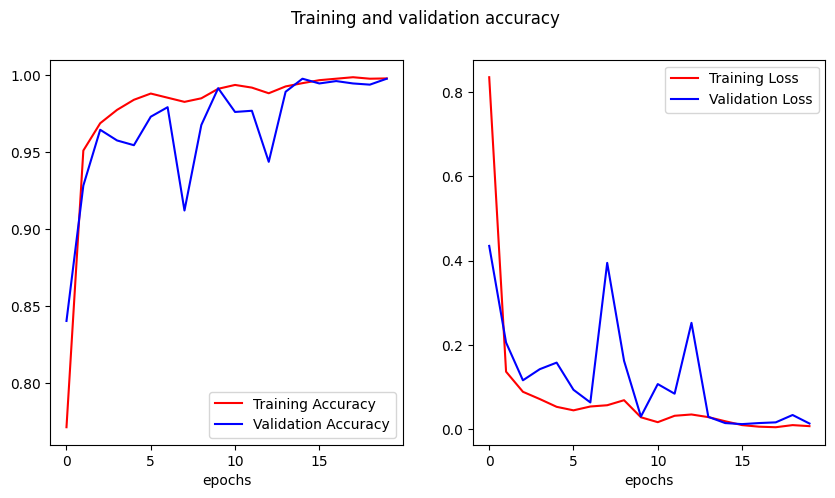

In [71]:
# Extract metrics from training history
acc = history.history['accuracy']       # Training accuracy over epochs
val_acc = history.history['val_accuracy']  # Validation accuracy over epochs
loss = history.history['loss']          # Training loss over epochs
val_loss = history.history['val_loss']  # Validation loss over epochs

# Determine the number of epochs
epochs = range(len(acc))

# Create subplots for accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # Two subplots side-by-side
fig.suptitle('Training and Validation Metrics')  # Main title for the figure

# Iterate through metrics to plot
for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)   # Plot training metric
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label) # Plot validation metric
    ax[i].legend()                     # Add a legend to distinguish lines
    ax[i].set_xlabel('Epochs')         # Label the x-axis as epochs
    ax[i].set_ylabel(label)            # Label the y-axis based on the metric

plt.show()  # Display the plots

**Evaluating Model Predictions with Confusion Matrix and Classification Report**

To assess how well the model performs on the validation dataset, we use the Confusion Matrix and Classification Report. These metrics provide a detailed breakdown of the model’s predictions across different classes.

4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 962ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 584ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 911ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 576ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 551ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 646ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


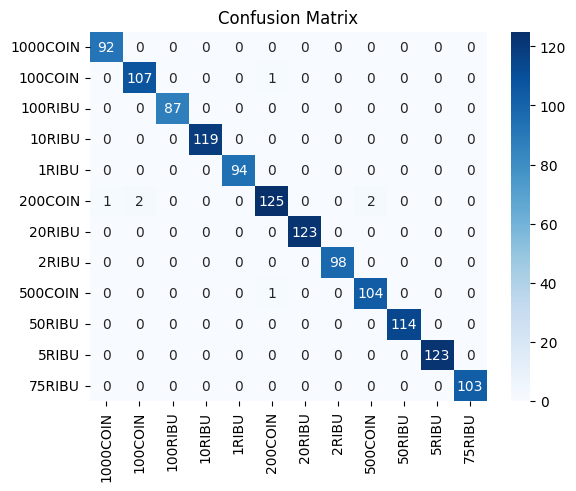

              precision    recall  f1-score   support

    1000COIN       0.99      1.00      0.99        92
     100COIN       0.98      0.99      0.99       108
     100RIBU       1.00      1.00      1.00        87
      10RIBU       1.00      1.00      1.00       119
       1RIBU       1.00      1.00      1.00        94
     200COIN       0.98      0.96      0.97       130
      20RIBU       1.00      1.00      1.00       123
       2RIBU       1.00      1.00      1.00        98
     500COIN       0.98      0.99      0.99       105
      50RIBU       1.00      1.00      1.00       114
       5RIBU       1.00      1.00      1.00       123
      75RIBU       1.00      1.00      1.00       103

    accuracy                           0.99      1296
   macro avg       0.99      1.00      0.99      1296
weighted avg       0.99      0.99      0.99      1296



In [72]:
# Get true labels and predicted labels for the validation dataset
y_true = []  # List to store true labels
y_pred = []  # List to store predicted labels

# Loop through the validation dataset
for images, labels in validation_dataset:
    preds = model.predict(images)  # Predict the labels for the batch of images
    y_true.extend(labels.numpy())  # Store the true labels
    y_pred.extend(np.argmax(preds, axis=1))  # Get the class with the highest probability

# Create a confusion matrix to visualize misclassifications
cm = confusion_matrix(y_true, y_pred)  # Compute confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)  # Heatmap for the confusion matrix
plt.title('Confusion Matrix')  # Set the plot title
plt.show()  # Display the heatmap

# Generate and print the classification report (precision, recall, F1-score)
print(classification_report(y_true, y_pred, target_names=class_names))  # Display classification metrics

### **Confusion Matrix and Classification Report Analysis**

From the classification report and confusion matrix, the model shows excellent performance in classifying the various currency denominations. Below is a breakdown of the results:

-------------------------------------------------------------------------------------------------

**Confusion Matrix**

The confusion matrix is a key metric for evaluating the model’s performance, especially with multi-class classification problems. The heatmap visualization would display a matrix where:

* Diagonal values represent correct classifications.
* Off-diagonal values represent misclassifications.

Given that the precision, recall, and F1-scores are very high for each class (near 1.00), we can infer that the model is making very few misclassifications. This suggests that:

* The model is correctly identifying the classes (e.g., "1000COIN", "100RIBU", etc.).
* Very few images from one class are predicted as another class, indicating high accuracy across all categories.

------------------------------------------------------------------------------------------------

**Classification Report Analysis**

The classification report provides detailed insights on the following metrics for each class:

1. Precision: Measures how many of the instances predicted as a certain class were actually that class.
2. Recall: Measures how many actual instances of a class were correctly predicted.
3. F1-score: The harmonic mean of precision and recall. It is a balanced metric that is particularly useful when the class distribution is imbalanced.
4. Support: The number of actual occurrences of each class in the dataset.

Here are the key points from the classification report:

1. High Precision, Recall, and F1-Score:

    * Most of the classes (such as 1000COIN, 100RIBU, 10RIBU, 1RIBU, 200COIN, etc.) have precision, recall, and F1-scores of 1.00, meaning the model has perfectly classified those classes.
    * Classes such as 100COIN, 200COIN, and 500COIN have slightly lower scores but still show excellent performance (e.g., 0.98 or 0.99), which is very good for such a classification task.

2. Overall Accuracy:

    * Overall accuracy is reported as 99% across the 12 classes, indicating that the model’s overall performance is excellent.

3. Macro and Weighted Averages:

    * The macro average shows an average precision of 0.99, recall of 1.00, and F1-score of 0.99, which reflects well-rounded performance across all classes.
    * The weighted average is similarly high, with 0.99 for precision, recall, and F1-score, which takes into account class imbalances if any.


### **Making Predictions on New Images**

In this section, the model is used to predict the class of a new image that is not part of the training or validation datasets. The image is preprocessed and then passed through the trained model to predict its class.

**Preprocessing and Predicting New Image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


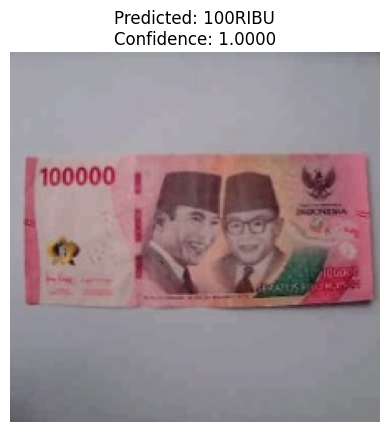

Predicted Class Index: 2
Predicted Class Name: 100RIBU


In [86]:
# Function to load and preprocess an image for prediction
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(120, 120))  # Resize image to match model input size
    img_array = img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension for prediction
    return img_array

# Path to a new test image
image_path = '/content/drive/Shared drives/Capstone Project/Dataset/dataset_powerful/test/100RIBU/1011.jpg'

# Preprocess the image
input_image = preprocess_image(image_path)

# Make a prediction using the trained model
predictions = model.predict(input_image)

# Decode the prediction
predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get the index of the highest probability
predicted_class_name = class_names[predicted_class_index]  # Get the class name based on the index

# Visualize the image and the prediction result
plt.imshow(load_img(image_path))  # Display the image
plt.title(f"Predicted: {predicted_class_name}\nConfidence: {predictions[0][predicted_class_index]:.4f}")  # Show prediction and confidence
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Output the predicted class index and name
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Class Name: {predicted_class_name}")

**Test on Random Images from Test Dataset**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


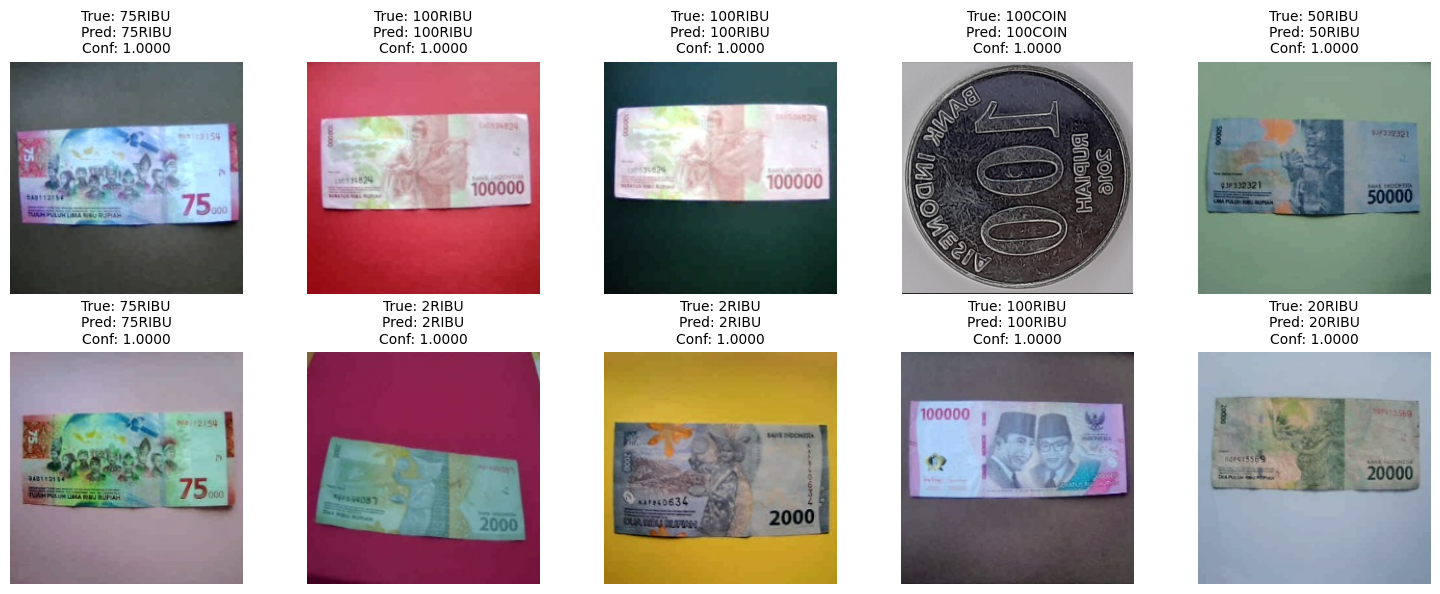

In [85]:
# Function to preprocess an image for prediction
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(120, 120))  # Resize image to match the model input size
    img_array = img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Path to the test dataset
test_dataset_path = '/content/drive/Shared drives/Capstone Project/Dataset/dataset_powerful/test'

# Function to select random images from the test dataset
def get_random_images(test_path, num_samples=5):
    class_names = os.listdir(test_path)  # Get class names (folder names)
    selected_images = []

    for _ in range(num_samples):
        random_class = random.choice(class_names)  # Choose a random class
        class_path = os.path.join(test_path, random_class)
        random_image = random.choice(os.listdir(class_path))  # Choose a random image
        selected_images.append((random_class, os.path.join(class_path, random_image)))

    return selected_images

# Test on random images
num_samples = 10  # Number of random samples to test
random_images = get_random_images(test_dataset_path, num_samples)

# Plot images in a grid layout (2 rows, 5 columns)
plt.figure(figsize=(15, 6))  # Set the figure size
rows, cols = 2, 5  # Define number of rows and columns for the grid
for idx, (true_label, image_path) in enumerate(random_images):
    # Preprocess image
    input_image = preprocess_image(image_path)

    # Make a prediction using the trained model
    predictions = model.predict(input_image)
    predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get the class with highest probability
    predicted_class_name = class_names[predicted_class_index]  # Get the class name
    confidence = predictions[0][predicted_class_index]  # Get the confidence level

    # Add image to subplot
    plt.subplot(rows, cols, idx + 1)
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes for better visualization
    plt.title(
        f"True: {true_label}\nPred: {predicted_class_name}\nConf: {confidence:.4f}",
        fontsize=10
    )

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### **Saving and Converting the Model**
In this step, the trained model is saved as an H5 file, which is a standard format for Keras models, and also converted to TensorFlow Lite (TFLite) format for deployment on mobile and embedded devices.

**Saving the Model as H5 and Converting to TFLite**

In [83]:
# Save the model as an H5 file
model.save('/content/drive/Shared drives/Capstone Project/Dataset/model/Model V2/rupismart_model.h5')  
# The model is saved in the H5 format, which is the standard format for Keras models.
# This allows you to easily load the model later using Keras' `load_model()` function.

# Convert the model to TensorFlow Lite format for deployment on mobile/embedded devices
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Convert Keras model to TFLite format
tflite_model = converter.convert()  # The conversion process

# Save the TFLite model to a file
with open('/content/drive/Shared drives/Capstone Project/Dataset/model/Model V2/rupismart_model.tflite', 'wb') as f:
    f.write(tflite_model)  # Write the converted model to a file

Saved artifact at '/tmp/tmpgi8dc3qb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name='keras_tensor_1824')
Output Type:
  TensorSpec(shape=(None, 12), dtype=tf.float32, name=None)
Captures:
  136171216413168: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  136170975230464: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  136170975075088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136170974822992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136170974833376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136170975083888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136170974833904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136170974835488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136170974828448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136170974827216: TensorSpec(shape=(), dtype=tf.resource, nam